In [ ]:
%matplotlib inline


Regression kriging
------------------

An example of regression kriging



In [17]:
import sys
import numpy as np
import pylab
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

from pykrige.rk import RegressionKriging
from pykrige.compat import train_test_split

svr_model = SVR(C=0.1)
rf_model = RandomForestRegressor(n_estimators=100)
lr_model = LinearRegression(normalize=True, copy_X=True, fit_intercept=False)

models = [svr_model, rf_model, lr_model]

try:
    housing = fetch_california_housing()
except PermissionError:
    # this dataset can occasionally fail to download on Windows
    sys.exit(0)

# take the first 5000 as Kriging is memory intensive
p = housing['data'][:5000, :-2]
x = housing['data'][:5000, -2:]
target = housing['target'][:5000]

p_train, p_test, x_train, x_test, target_train, target_test \
    = train_test_split(p, x, target, test_size=0.3, random_state=42)

for m in models:
    print('=' * 40)
    print('regression model:', m.__class__.__name__)
    m_rk = RegressionKriging(regression_model=m, n_closest_points=10)
    m_rk.fit(p_train, x_train, target_train)
    print('Regression Score: ', m_rk.regression_model.score(p_test, target_test))
    print('RK score: ', m_rk.score(p_test, x_test, target_test))

##====================================OUTPUT==================================

# ========================================
#  regression model: <class 'sklearn.svm.classes.SVR'>
# Finished learning regression model
# Finished kriging residuals
# Regression Score:  -0.034053855457
# RK score:  0.66195576665
# ========================================
#  regression model: <class 'sklearn.ensemble.forest.RandomForestRegressor'>
# Finished learning regression model
# Finished kriging residuals
# Regression Score:  0.699771164651
# RK score:  0.737574040386
# ========================================
#  regression model: <class 'sklearn.linear_model.base.LinearRegression'>
# Finished learning regression model
# Finished kriging residuals
# Regression Score:  0.527796839838
# RK score:  0.604908933617

('regression model:', 'SVR')
Finished learning regression model
Finished kriging residuals
('Regression Score: ', -0.034053855456982918)
('RK score: ', 0.66195576665019651)
('regression model:', 'RandomForestRegressor')
Finished learning regression model
Finished kriging residuals
('Regression Score: ', 0.70095772575157156)
('RK score: ', 0.73561309020971888)
('regression model:', 'LinearRegression')
Finished learning regression model
Finished kriging residuals
('Regression Score: ', 0.52779683983816739)
('RK score: ', 0.60490893361672504)


In [18]:
np.shape(x)

(5000L, 2L)

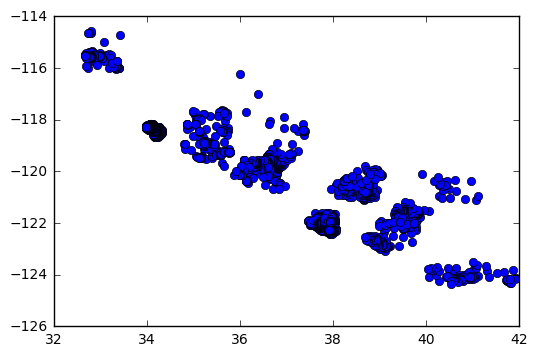

In [21]:
pylab.plot(x[:,0],x[:,1], 'o')
pylab.show()